In [1]:
import HeST as hest
import HeST.Amherst_Example_Detector as examp
import numpy as np
import matplotlib.pyplot as plt

# Load the example detector based on the Amherst cell

In [16]:
detector = examp.DetectorExample_Amherst

## Use the WIMP Generator to create an energy spectrum, and compare to a flat ER signal.
### Generate quanta, and then convert the total number of singlet photons and quasiparticles into observable pulse areas, in eV.

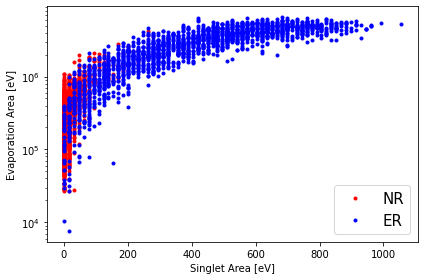

In [17]:

#create a WIMP energy spectrum!
e_WIMP = []
mass = 5000 # MeV
nEvents = 2000

prep = hest.WIMP_spectrum_prep(mass)
for i in range(nEvents):
    e_WIMP.append( hest.WIMP_spectrum(mass, *prep) )
    

spectrum = np.random.uniform(20, 10000, size=nEvents) #20eV to 10keV


nrSinglet, nrTriplet, nrQP = [], [], []
erSinglet, erTriplet, erQP = [], [], []
for i in range(nEvents):
    q = hest.GetQuanta(e_WIMP[i], "NR")
    sig = hest.GetSingletSignal(detector, q.SingletPhotons, 0, 0, 1)
    evap = hest.GetEvaporationSignal( detector, q.Quasiparticles, 0, 0, 1)
    nrSinglet.append( sig.area_eV )
    nrQP.append( evap.area_eV )
    
    q = hest.GetQuanta(spectrum[i], "ER")
    sig = hest.GetSingletSignal(detector, q.SingletPhotons, 0, 0, 1)
    evap = hest.GetEvaporationSignal( detector, q.Quasiparticles, 0, 0, 1)
    erSinglet.append( sig.area_eV )
    erQP.append( evap.area_eV )
    
    
nrSinglet, nrTriplet, nrQP = np.array(nrSinglet), np.array(nrTriplet), np.array(nrQP)
erSinglet, erTriplet, erQP = np.array(erSinglet), np.array(erTriplet), np.array(erQP)

plt.plot( nrSinglet, nrQP, 'r o', ms=3, label='NR')
plt.plot( erSinglet, erQP, 'b o', ms=3, label='ER')

plt.xlabel('Singlet Area [eV]')
plt.ylabel('Evaporation Area [eV]')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.legend(loc='best', fontsize=15)
plt.show()